In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('winequality-red.csv',sep=';')
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
origcols=list(df.columns)
origcols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

# статистика по значениям качества:

In [3]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [4]:
df['column_bin'] = pd.cut(df['quality'], bins=[0, 6.5, 8], include_lowest=True,right=True)
bin_counts = df['column_bin'].value_counts()
print(bin_counts)


(-0.001, 6.5]    1382
(6.5, 8.0]        217
Name: column_bin, dtype: int64


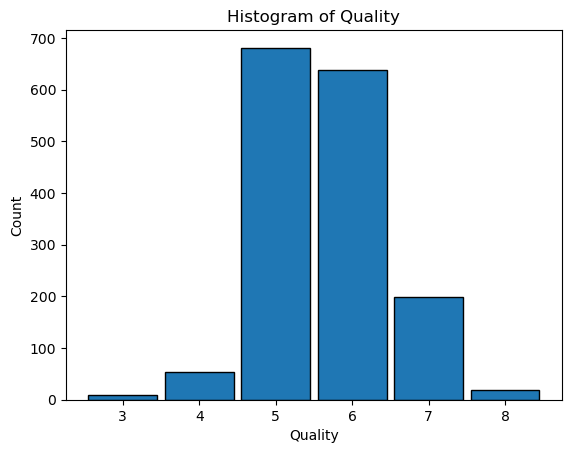

In [5]:
# Calculate counts of each unique 'quality' value
counts = df['quality'].value_counts().sort_index()

# Calculate bin centers (which are just the unique 'quality' values)
bin_centers = counts.index

# Create new figure
plt.figure()

# Use bar to plot histogram with centered bars
plt.bar(bin_centers, counts, width=0.9, align='center', edgecolor='black', tick_label=bin_centers)

# Add labels and title
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Histogram of Quality')

# Show the plot
plt.show()

In [6]:
df[origcols]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
# Analyze the distributions of variables and their correlation with the target variable

# Split the data into features and target variable
X = df[origcols].drop('quality', axis=1)
y = df['quality']

# Convert the target variable into a categorical variable
y = y.apply(lambda x: 'good wine' if x > 6.5 else 'bad wine')

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0])

In [8]:
dff = pd.DataFrame(y, columns=['ColumnName'])
dff['ColumnName'].value_counts()

0    1382
1     217
Name: ColumnName, dtype: int64

In [9]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.metrics import make_scorer, accuracy_score
from time import time
# Define the SVM model
svm = SVC()

# Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly'] #, 'rbf', 'sigmoid'
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5,verbose=4,n_jobs=-1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly']},
             verbose=4)

In [14]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from itertools import product
import time

class TimedSVC(BaseEstimator, ClassifierMixin):
    callback = None
    def __init__(self, *args, **kwargs):
        if 'callback' in kwargs:
            TimedSVC.callback = kwargs.pop('callback')
        self.svc = SVC(*args, **kwargs)

    def fit(self, X, y):
        X, y = check_X_y(X, y)        
        start = time.time()
        
        self.svc.fit(X, y)
        elapsed_time = time.time()-start
        #Editing to call the callback with parameters and elapsed time
        if self.callback: 
            TimedSVC.callback(self.svc.get_params(), elapsed_time)
        
        # for the check_is_fitted in the predict method
        self.is_fitted_ = True
        return self

    def predict(self, X):
        check_is_fitted(self)
        return self.svc.predict(X)
    
    def get_params(self, deep=True):
        return self.svc.get_params(deep)
    
    def set_params(self, **params):
        self.svc.set_params(**params)
        super().set_params(**params)
        return self

def create_callback(total_combinations):
    times_of_combinations = {} # storing time of each fit per combination
    avg_time_per_fit = [0]
    def print_params_time(params, elapsed_time):
        frozen_params = frozenset(params.items())
        if frozen_params in times_of_combinations:
            times_of_combinations[frozen_params].append(elapsed_time)
        else:
            times_of_combinations[frozen_params] = [elapsed_time]
        total_times = [sum(times) for times in times_of_combinations.values()]
        avg_time_per_fit[0] = sum(total_times) / len(total_times)
        remaining_combinations = total_combinations - len(times_of_combinations)
        estimated_remaining_time = max(avg_time_per_fit[0] * remaining_combinations, 0)
        print("Fit done, params: ", params)
        print("Time elapsed for current fit: ", elapsed_time, "s")
        print(f"{len(times_of_combinations)} unique combinations completed. Average time per combination: {avg_time_per_fit[0]} s")
        print(f"{remaining_combinations} combinations remaining. Estimated remaining time: {estimated_remaining_time} s")
    return print_params_time

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] #
}

combination_counts = len(list(product(*param_grid.values())))

# Creating the callback with total combination counts
print_params_time = create_callback(combination_counts)

# Pass the callback
svm = TimedSVC(callback=print_params_time)

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5,  n_jobs=-1)
grid_search.fit(X_train, y_train)

Fit done, params:  {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Time elapsed for current fit:  0.0830070972442627 s
1 unique combinations completed. Average time per combination: 0.0830070972442627 s
63 combinations remaining. Estimated remaining time: 5.22944712638855 s


GridSearchCV(cv=5,
             estimator=TimedSVC(C=1.0, break_ties=False, cache_size=200,
                                class_weight=None, coef0=0.0,
                                decision_function_shape='ovr', degree=3,
                                gamma='scale', kernel='rbf', max_iter=-1,
                                probability=False, random_state=None,
                                shrinking=True, tol=0.001, verbose=False),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [15]:

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = best_model.predict(X_test)

# Evaluate the model using the accuracy metric
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Optionally, you can also print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Best hyperparameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Fit done, params:  {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Time elapsed for current fit:  0.09501123428344727 s
1 unique combinations completed. Average time per combination: 0.17801833152770996 s
63 combinations remaining. Estimated remaining time: 11.215154886245728 s
Accuracy: 0.890625
Confusion Matrix:
[[271   2]
 [ 33  14]]


можно сделать вывод, что модель хорошо справляется с предсказанием положительного класса (большинства примеров), но менее точна в предсказании отрицательного класса. Это может быть связано с несбалансированностью классов в данных

In [18]:
print(X[:5],y[:5])

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4   [0 0 0 0

In [17]:
from sklearn.model_selection import ParameterGrid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['rbf']
}

classifiers = []

for params in ParameterGrid(param_grid):
    C = params['C']
    gamma = params['gamma']
    kernel = params['kernel']
  
    clf = SVC(C=C, gamma=gamma, kernel=kernel)
    clf.fit(X, y)
  
    classifiers.append((C, gamma, clf))

# Visualization

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))

n_C = len(param_grid['C'])
n_gamma = len(param_grid['gamma'])

for i, (C, gamma, clf) in enumerate(classifiers):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(n_C, n_gamma, i + 1)
    plt.title("gamma={}, C={}".format(gamma, C), size="medium")

    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu_r, edgecolors="k")
    plt.xticks(())
    plt.yticks(())
    plt.axis("tight")

c:\ProgramData\miniconda3\envs\myenv3_8_\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but SVC is expecting 11 features as input.

<Figure size 800x600 with 0 Axes>

In [34]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] #
}
C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

# Визуализация
# рисуем визуализацию эффектов параметров

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # оценим функцию принятия решения в сетке
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # визуализируем функцию принятия решения для этих параметров
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)), size="medium")

    # визуализируем влияние параметра на функцию принятия решения
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r, edgecolors="k")
    plt.xticks(())
    plt.yticks(())
    plt.axis("tight")

1.3.0
